# MATH 307 Assignment 2 (UPDATED June 16)

### Instructions

* There are 3 exercises and 30 total points.
* Write your solutions in the cells below.
* You may work on these problems with others but you must write your solutions on your own.
* Execute the test cells to verify that your solutions pass.
* **Grading includes hidden tests!** Your solution may not be completely correct even if it passes all tests below.
* Make sure your notebook executes correctly in order from top to bottom.
* Submit this notebook to Canvas.

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn import datasets
import networkx as nx

## Exercise 1: Principal Component Analysis

The following code imports the digits dataset from [sklearn](https://scikit-learn.org/stable/) and selects the subset of the data correpsonding to the digit `9`.

    data = datasets.load_digits()
    X = data['data']
    y = data['target']
    X9 = X[y == 9] # This line selects the rows corresponding to 9s

Copy, paste and modify this code to find the first weight vector for the data consisting of the digit `4`. Use the code from [MATH 307 notebook on PCA](https://github.com/patrickwalls/math307/blob/master/09_pca.ipynb). Reshape the first weight vector as a 8 by 8 matrix and save the result as `w`.

Verify your weight vector by plotting the matrix with the command:

```
plt.imshow(w,cmap='binary',interpolation='gaussian')
```

In [2]:
# YOUR CODE HERE
data = datasets.load_digits()
X = data['data']
y = data['target']
X9 = X[y == 9] # This line selects the rows corresponding to 9s
X4 = X[y == 4] # This line selects the rows corresponding to 4s
X4_origin = X4 - X4.mean(axis = 0)
X4_origin.mean(axis = 0)

array([ 0.00000000e+00,  0.00000000e+00,  2.07936799e-16, -5.20148688e-16,
        9.81412618e-16,  2.11003713e-16,  2.22964679e-16, -7.36059464e-17,
        0.00000000e+00,  3.18192372e-17, -4.51449804e-16,  9.81412618e-18,
       -2.29650553e-15,  7.55687716e-16,  4.19553894e-16, -2.20817839e-16,
        0.00000000e+00, -3.92565047e-17, -7.85130095e-16,  8.83271357e-16,
        2.74795533e-15, -3.14052038e-16, -1.27583640e-15, -4.68011142e-16,
        1.17309477e-17,  9.32341988e-16,  3.53308543e-16, -5.64312256e-16,
        1.99226762e-15,  6.47732328e-16,  2.14438657e-15,  3.95631962e-17,
        0.00000000e+00, -6.28104076e-16, -5.29962814e-16, -6.67360581e-16,
        1.20713752e-15, -4.22007426e-16, -2.74795533e-16,  0.00000000e+00,
        1.17769514e-16, -2.52223043e-15, -4.80892183e-16, -2.74795533e-16,
       -1.96282524e-16,  4.80892183e-16, -9.32341988e-16,  0.00000000e+00,
       -3.08224900e-17,  1.64386614e-16,  2.00453527e-15, -7.26245338e-16,
        1.96282524e-17, -

In [4]:
P,S,QT = la.svd(X4_origin)  #singular value decomposition

In [5]:
w = QT[0,:].reshape(8,8) # the first column of Q, the first row of QT

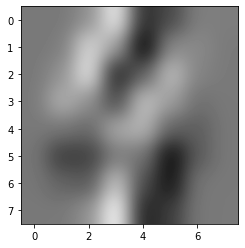

In [6]:
plt.imshow(w,cmap='binary',interpolation='gaussian')

In [7]:
# Verify w is a NumPy array
assert isinstance(w,np.ndarray)
print("Exercises 1 Test 1: Success!")

Exercises 1 Test 1: Success!


In [8]:
# Verify w has the correct size
assert w.shape == (8,8)
print("Exercises 1 Test 2: Success!")

Exercises 1 Test 2: Success!


In [9]:
# Verify w has correct values (up to absolute value)
assert np.allclose(np.abs(w[4:6,4:6]),np.abs(np.array([[0.15131046, 0.05404152],[0.00949909, 0.27111392]])))
print("Exercises 1 Test 3: Success!")

Exercises 1 Test 3: Success!


## Exercise 2: SVD of Toeplitz matrices

The SVD of a matrix $A = P \Sigma Q^T$ yields a formula for $A$ as a sum of rank one matrices

$$
A = \sigma_1 \mathbf{p}_1 \mathbf{q}_1^T + \cdots + \sigma_r \mathbf{p}_r \mathbf{q}_r^T
$$

The truncated SVD of rank $k \leq r$ is given by

$$
A_k = \sigma_1 \mathbf{p}_1 \mathbf{q}_1^T + \cdots + \sigma_k \mathbf{p}_k \mathbf{q}_k^T
$$

Note that the product of vectors $\mathbf{p} \mathbf{q}^T$ is called the outer product. Use the function [`numpy.outer`](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) to compute the outer product of vectors.

The following code creates a Toeplitz matrix $A$ of size $N$.

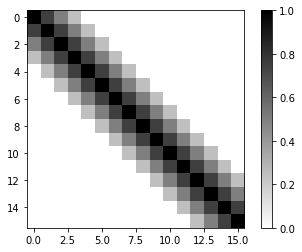

In [10]:
N = 16
c = np.zeros(N)
c[:4] = np.array([1.0,0.75,0.5,0.25])
A = la.toeplitz(c)
plt.imshow(A,cmap='binary')
plt.colorbar()
plt.show()

(a) Compute the SVD of $A$, compute $\sigma_1 \mathbf{p}_1 \mathbf{q}_1^T$ and save the result as `s1p1q1T`. Recall, in Python, array indices begin at 0 not 1.

In [11]:
# YOUR CODE HERE
P,S,QT = la.svd(A)
s1 = S[0]
p1 = P[:,0]

q1T = QT[0,:]

s1p1q1T = s1*np.outer(p1,q1T)

In [12]:
# Verify s1p1q1T is a NumPy array
assert isinstance(s1p1q1T,np.ndarray)
print("Exercises 2a Test 1: Success!")

Exercises 2a Test 1: Success!


In [13]:
# Verify s1p1q1T is the correct size
assert s1p1q1T.shape == (16,16)
print("Exercises 2a Test 2: Success!")

Exercises 2a Test 2: Success!


In [14]:
# Verify s1p1q1T has the correct values
assert np.allclose(s1p1q1T[:2,:2],np.array([[0.03147122, 0.04833746],[0.04833746, 0.07424275]]))
print("Exercises 2a Test 3: Success!")

Exercises 2a Test 3: Success!


(b) Plot the matrix $\sigma_k \mathbf{p}_k \mathbf{q}_k^T$ for different values $k$ using the code

    skpkqkT = # Modify your code from part (a)
    plt.imshow(skpkqkT,cmap='binary')
    plt.colorbar()

Based on your observations, determine whether the following statement is `True` or `False`:

> As $k$ increases, the matrix $\sigma_k \mathbf{p}_k \mathbf{q}_k^T$ contains higher frequency data. In other words, as $k$ increases, the entries in the matrix oscillate more quickly from entry to entry across the matrix.

Save your response to the variable `high_frequency`.

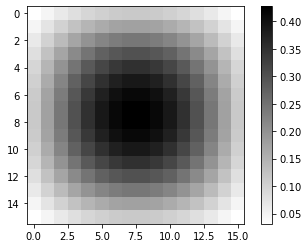

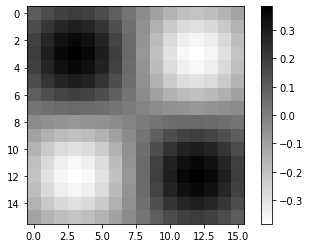

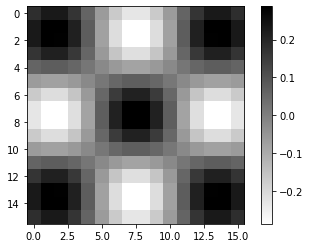

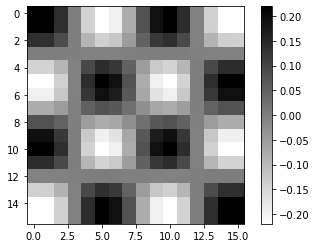

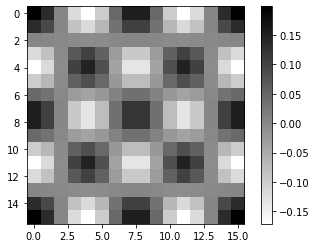

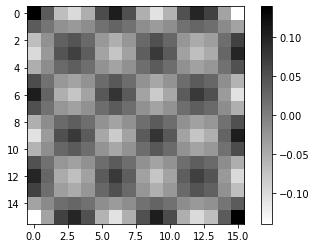

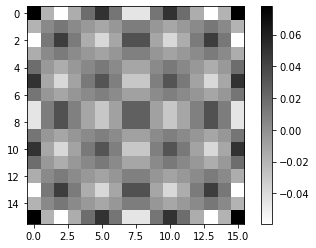

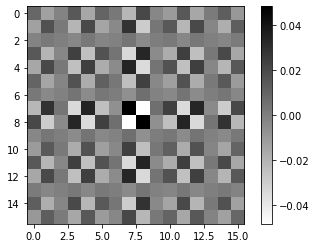

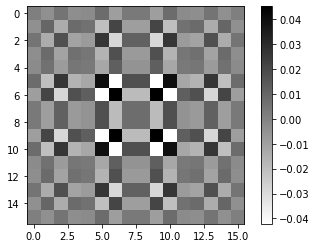

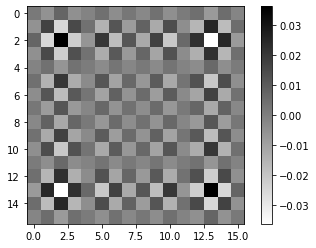

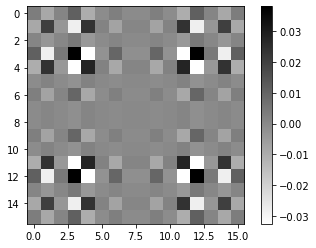

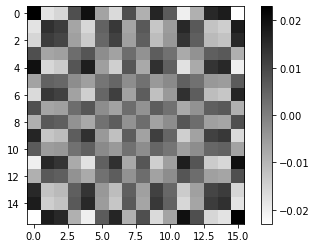

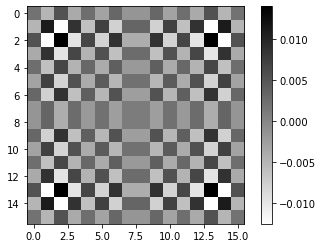

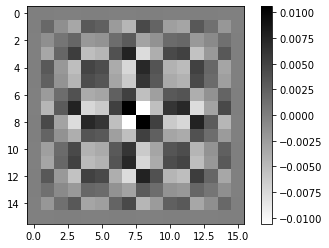

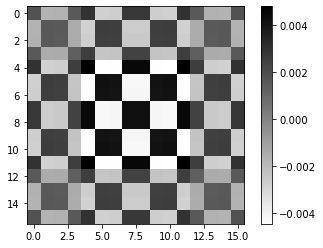

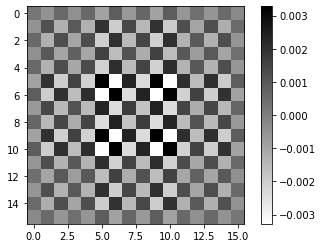

In [15]:
# YOUR CODE HERE
for k in range (0,16):
    skpkqkT = S[k]*np.outer(P[:,k],QT[k,:])# Modify your code from part (a)
    plt.figure()
    plt.imshow(skpkqkT,cmap='binary')
    plt.colorbar()

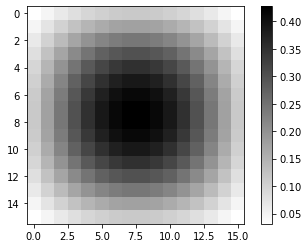

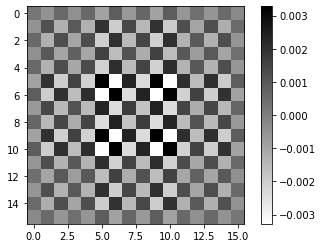

In [16]:
for k in [0,15]:
    skpkqkT = S[k]*np.outer(P[:,k],QT[k,:])# Modify your code from part (a)
    plt.figure()
    plt.imshow(skpkqkT,cmap='binary')
    plt.colorbar()

In [17]:
high_frequency = True

In [18]:
# Verify high_frequency is defined as True or False (boolean value)
assert isinstance(high_frequency,bool)
print("Exercises 2b Test 1: Success!")

Exercises 2b Test 1: Success!


In [19]:
# Verify high_frequency has correct value
assert isinstance(high_frequency,bool)
print("Exercises 2b Test 2: Success!")

Exercises 2b Test 2: Success!


(c) Use `plt.plot(S,'b.')` to plot the singular values of $A$ as a scatter plot. How many singular values are greater than $1/2$? Save your response as `n_singular_values`.

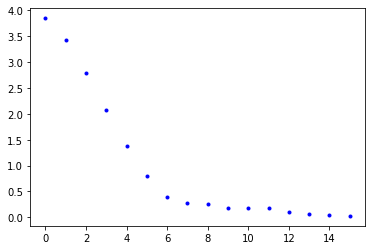

In [20]:
# YOUR CODE HERE
plt.plot(S,'b.')

In [21]:
n_singular_values = len(S[S>0.5])
print(type(n_singular_values))
n_singular_values

<class 'int'>


6

In [22]:
# Verify n_singular_values is defined as an integer
assert isinstance(n_singular_values,int)
print("Exercises 2c Test 1: Success!")

Exercises 2c Test 1: Success!


In [23]:
# Verify n_singular_values has correct value
assert isinstance(n_singular_values,int)
print("Exercises 2c Test 2: Success!")

Exercises 2c Test 2: Success!


(d) The following code computes the truncated SVD $A_k$

    Ak = sum([S[i]*np.outer(P[:,i],QT[i,:]) for i in range(0,k)])

Copy, paste and modify the code to compute the truncated pseudoinverse

$$
A_k^+ = \frac{1}{\sigma_1} \mathbf{q}_1 \mathbf{p}_1^T + \cdots + \frac{1}{\sigma_k} \mathbf{q}_k \mathbf{p}_k^T
$$

where $k$ is the number found in part (c). In other words, $\sigma_1,\dots,\sigma_k > 1/2$ and $\sigma_m \leq 1/2$ for $m > k$. Save the result as `Ak_plus`.

In [24]:
# YOUR CODE HERE
k = n_singular_values
Ak = sum([S[i]*np.outer(P[:,i],QT[i,:]) for i in range(0,k)])
Ak_plus = sum ([(1/S[i])*np.outer(QT.T[:,i],P.T[i,:]) for i in range(0,k)])
Ak_plus

array([[ 4.13290875e-01,  2.31361869e-01, -2.28602099e-02,
        -1.74376057e-01, -1.74812945e-01, -3.25051747e-04,
         1.44333772e-01,  1.27394408e-01, -6.85526545e-03,
        -1.23865400e-01, -1.03489175e-01,  2.26520956e-02,
         1.03611039e-01,  9.55394037e-02, -2.28598691e-02,
        -1.51597249e-01],
       [ 2.31361869e-01,  1.77938724e-01,  6.99544403e-02,
        -2.59981146e-02, -7.49901661e-02, -4.03872089e-02,
         1.70884638e-02,  4.07547215e-02,  2.11989234e-02,
        -1.46070386e-02, -2.69229260e-02, -8.41828988e-03,
         1.22350386e-02,  2.03354813e-02,  2.93154537e-03,
        -2.28598691e-02],
       [-2.28602099e-02,  6.99544403e-02,  1.46751607e-01,
         1.44221709e-01,  6.80604144e-02, -4.86028447e-02,
        -1.06185764e-01, -6.39839891e-02,  2.74114722e-02,
         8.55778188e-02,  5.64790778e-02, -2.56099382e-02,
        -6.95782839e-02, -5.52770657e-02,  2.03354813e-02,
         9.55394037e-02],
       [-1.74376057e-01, -2.59981146e

In [25]:
# Verify Ak_plus is a NumPy array
assert isinstance(Ak_plus,np.ndarray)
print("Exercises 2d Test 1: Success!")

Exercises 2d Test 1: Success!


In [26]:
# Verify Ak_plus has the correct shape
assert Ak_plus.shape == (16,16)
print("Exercises 2d Test 2: Success!")

Exercises 2d Test 2: Success!


In [27]:
# Verify Ak_plus has the correct values
assert np.allclose(Ak_plus[:2,:2],np.array([[0.41329088, 0.23136187],[0.23136187, 0.17793872]]))
print("Exercises 2d Test 3: Success!")

Exercises 2d Test 3: Success!


## Exercise 3: PageRank

The cell below reads the data from the file `webgraph.txt` and creates a directed graph $G$ with 100 nodes, its adjacency matrix $A$ and the stochastic matrix $P$, and plots the graph. The matrix $P$ represents the markov chain for the process: at each step, click a random link on the page.

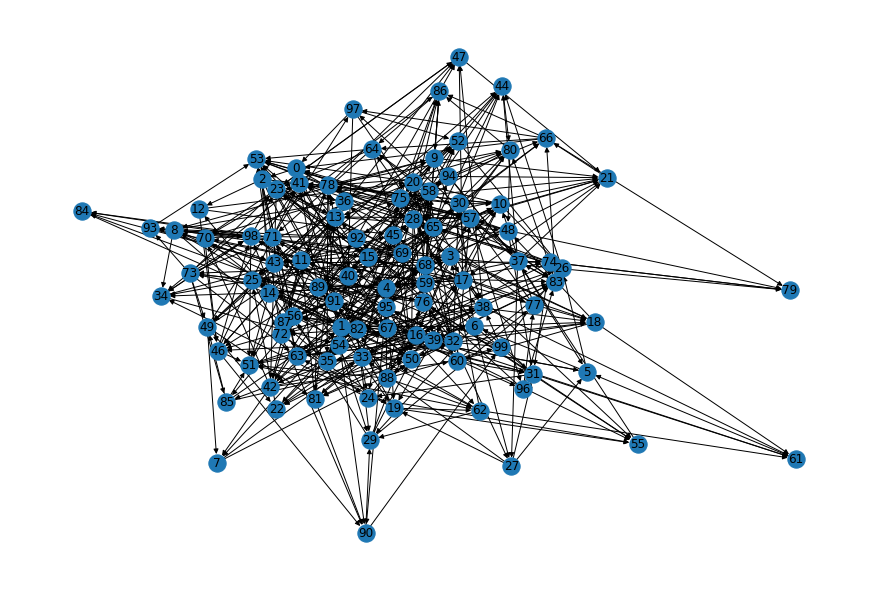

In [28]:
G = nx.read_edgelist('webgraph.txt',create_using=nx.DiGraph)
mapping = {n: i for i,n in enumerate(G.nodes)}
G = nx.relabel_nodes(G,mapping)
A = np.array(nx.adjacency_matrix(G).todense().T)
P = A/A.sum(axis=0)

plt.figure(figsize=(12,8))
nx.draw(G,with_labels=True)
plt.show()

(a) Create the Google matrix $\alpha P + (1 - \alpha)\mathbf{v} \mathbf{e}^T$ for $\alpha = 0.85$ where $\mathbf{e}$ is the vector with all ones and $\mathbf{v} = 0.01 \mathbf{e}$ is the uniform distribution vector for $N=100$ nodes. Save the result as `M`.

In [29]:
# YOUR CODE HERE
N = 100
alpha = 0.85
M = alpha*P + (1-alpha)*(1/N)*np.ones((N,N))



In [30]:
# Verify M is a NumPy array
assert isinstance(M,np.ndarray)
print("Exercises 3a Test 1: Success!")

Exercises 3a Test 1: Success!


In [31]:
# Verify M has the correct size
assert M.shape == (100,100)
print("Exercises 3a Test 2: Success!")

Exercises 3a Test 2: Success!


In [32]:
# Verify M has correct values
assert np.allclose(M[:2,:2],np.array([[0.0015, 0.0015],[0.214 , 0.0015]]))
print("Exercises 3a Test 3: Success!")

Exercises 3a Test 3: Success!


(b) The following code performs 5 iterations of the power method (without normalization) with initial vector $\mathbf{x}_0 = [1 \ 0 \ \cdots \ 0]^T$:

    iterations = 5
    xk = np.zeros(100)
    xk[0] = 1
    for k in range(0,iterations):
        xk = M @ xk
    
Copy, paste and modify the code to perform 10 iterations and use the function `numpy.argmax` to find the webpage with the highest probability in the state vector $\mathbf{x}_k$. Save the index as `webpage1`. Plot the graph with colors given by the state vector using the following code:

    plt.figure(figsize=(12,8))
    nx.draw(G,node_color=xk,cmap='winter',with_labels=True)

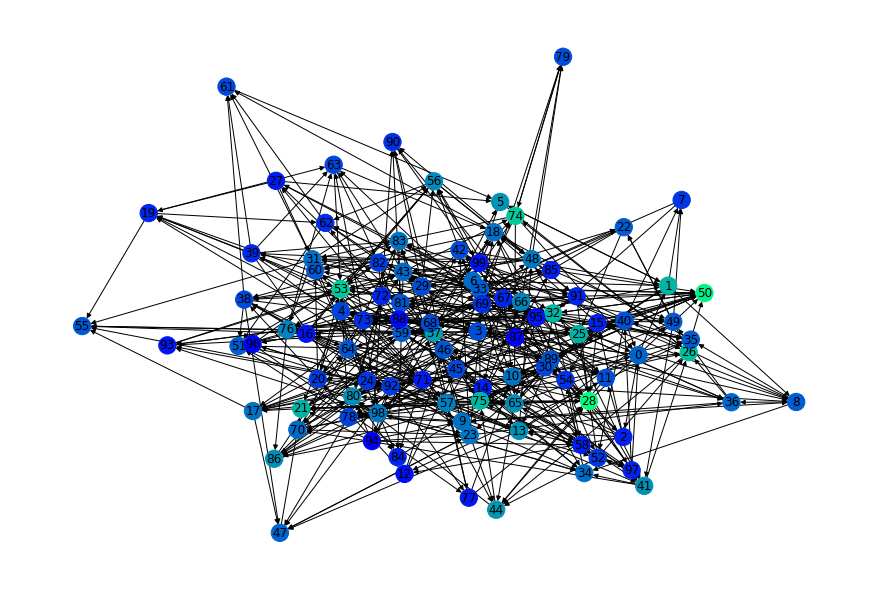

In [33]:
# YOUR CODE HERE
iterations = 10
xk = np.zeros(100)
xk[0] = 1
for k in range(0,iterations):
    xk = M @ xk
webpage1 = np.argmax(xk) #index
plt.figure(figsize=(12,8))
nx.draw(G,node_color=xk,cmap='winter',with_labels=True)

In [34]:
# Verify webpage1 is a NumPy integer
assert isinstance(webpage1,np.int64)
print("Exercises 3b Test 1: Success!")

Exercises 3b Test 1: Success!


In [35]:
# Verify webpage1 has the correct value
assert isinstance(webpage1,np.int64)
print("Exercises 3b Test 2: Success!")

Exercises 3b Test 2: Success!


(c) Repeat (b) but now with 100 iterations. Save the result as `webpage2`.

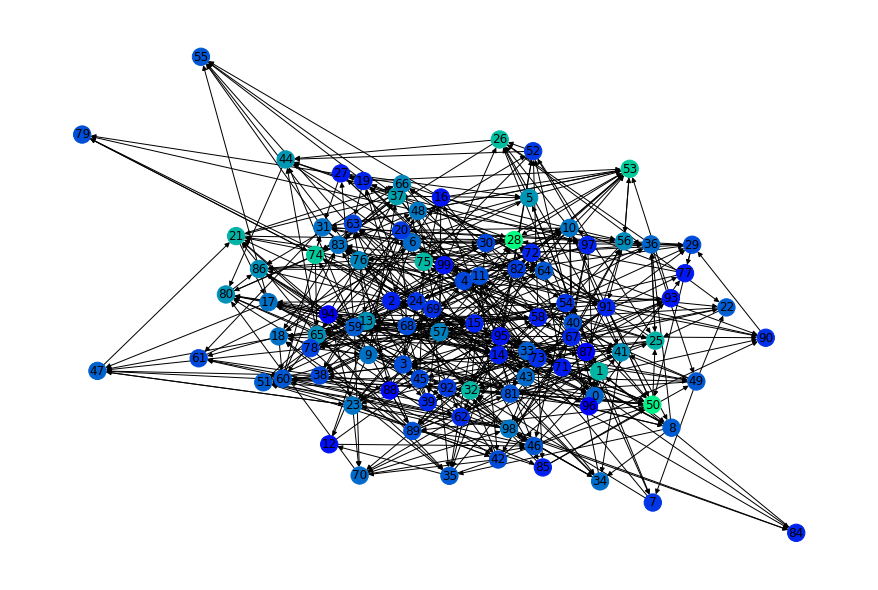

In [36]:
# YOUR CODE HERE
iterations = 100
xk = np.zeros(100)
xk[0] = 1
for k in range(0,iterations):
    xk = M @ xk
webpage2 = np.argmax(xk) #index
plt.figure(figsize=(12,8))
nx.draw(G,node_color=xk,cmap='winter',with_labels=True)

In [37]:
# Verify webpage2 is a NumPy integer
assert isinstance(webpage2,np.int64)
print("Exercises 3c Test 1: Success!")

Exercises 3c Test 1: Success!


In [38]:
# Verify webpage2 has the correct value
assert isinstance(webpage2,np.int64)
print("Exercises 3c Test 2: Success!")

Exercises 3c Test 2: Success!


(d) Let $\mathbf{v}$ be the vector where $v_i = 1/10$ for the 10 indices $i=94, 96, 87, 88, 12, 95, 16, 93, 99, 77$ and all other $v_j = 0$. Create the Google matrix for $\alpha = 0.9$ and the vector $\mathbf{v}$ defined in the cell above. Save the result as `M10`.

The indices included in $\mathbf{v}$ are the webpages with lowest pagerank after 20 iterations. Execute the cell below to verify. The matrix `M10` is the stochastic matrix for the process: either click a link with probability 0.9 or return to one of the low rank webpages listed in $\mathbf{v}$.

In [39]:
iterations = 20
xk = np.zeros(100)
xk[0] = 1
for k in range(0,iterations):
    xk = M@xk

np.argsort(xk)[:10]

array([94, 96, 87, 88, 12, 95, 16, 93, 99, 77])

In [40]:
# YOUR CODE HERE
N = 100
alpha = 0.9

v = np.zeros((N,1))
v[np.argsort(xk)[:10]] = 1/10
e = np.ones((N,1))

M10 = alpha*P + (1-alpha)*v@e.T

M10




array([[0.   , 0.   , 0.   , ..., 0.225, 0.   , 0.   ],
       [0.225, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.225, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.01 , 0.01 , 0.01 , ..., 0.01 , 0.01 , 0.01 ]])

In [41]:
# Verify M10 is a NumPy array
assert isinstance(M10,np.ndarray)
print("Exercises 3d Test 1: Success!")

Exercises 3d Test 1: Success!


In [42]:
# Verify M10 has the correct size
assert M10.shape == (100,100)
print("Exercises 3d Test 2: Success!")

Exercises 3d Test 2: Success!


In [43]:
# Verify M10 has the correct values
assert np.allclose(M10[87:89,90:92],np.array([[0.01, 0.11],[0.01, 0.01]]))
print("Exercises 3d Test 3: Success!")

Exercises 3d Test 3: Success!


(e) Let's see if this new markov chain changes the result. Compute 10 iterations of the power method (without normalization) for `M10` starting with initial vector $\mathbf{x}_0 = [1 \ 0 \ \cdots \ 0]^T$. Use the function `numpy.argmax` to find the webpage with the highest probability in the state vector $\mathbf{x}_k$. Save the index as `webpage3`.

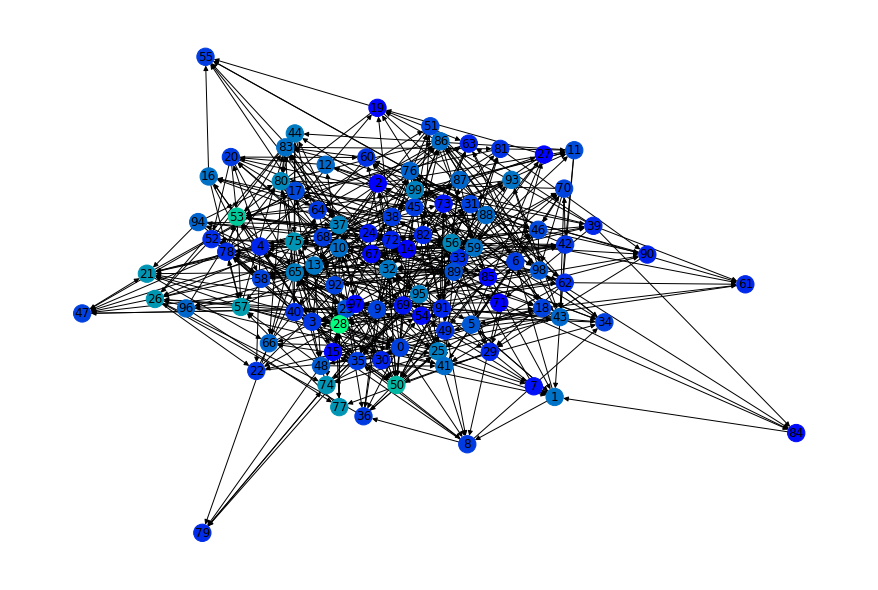

In [44]:
# YOUR CODE HERE
iterations = 10
xk = np.zeros(100)
xk[0] = 1
for k in range(0,iterations):
    xk = M10 @ xk
webpage3 = np.argmax(xk) #index
plt.figure(figsize=(12,8))
nx.draw(G,node_color=xk,cmap='winter',with_labels=True)



In [45]:
# Verify webpage3 is a NumPy integer
assert isinstance(webpage3,np.int64)
print("Exercises 3e Test 1: Success!")

Exercises 3e Test 1: Success!


In [46]:
# Verify webpage2 has the correct value
assert isinstance(webpage3,np.int64)
print("Exercises 3e Test 2: Success!")

Exercises 3e Test 2: Success!


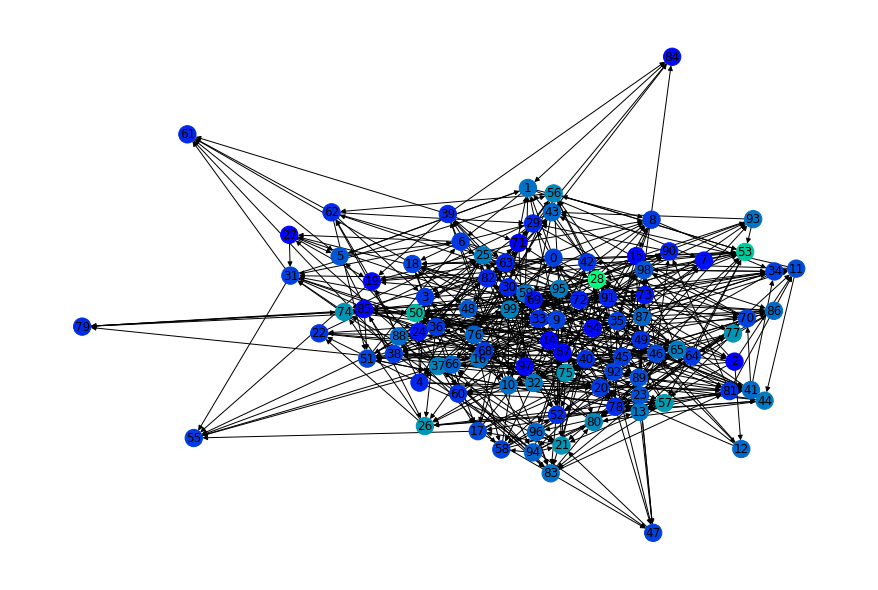

In [48]:
plt.figure(figsize=(12,8))
nx.draw(G,node_color=xk,cmap='winter',with_labels=True)